# Introduction
In a series of weekly articles, I will be covering some important topics of statistics with a twist.

The goal is to use Python to help us get intuition on complex concepts, empirically test theoretical proofs, or build algorithms from scratch. In this series, you will find articles covering topics such as random variables, sampling distributions, confidence intervals, significance tests, and more.

At the end of each article, you can find exercises to test your knowledge. The solutions will be shared in the article of the following week.

Articles published so far:
- [Bernoulli and Binomial Random Variables with Python](https://towardsdatascience.com/bernoulli-and-binomial-random-variables-d0698288dd36)

As usual the code is available on my [GitHub](https://github.com/luisroque/College_Statistics_with_Python).

## Comparing Geometric Random Variables and Binomial Random Variables

Let's start by recapping what a Binomial Random Variable (RV) is. Here is the checklist:
* The trials are independent
* Each trial can be classified as either success or failure
* Fixed number of trials
* Probability of success on each trial is constant

An example of such a variable could be $X$, *the number of 5's after 10 rolls of a fair die*. Notice that the trials are independent, rolling the die in the first trial does not impact the rolling of the die in the second trial. We can clearly classify the trials as success (we got a 5!) or failure (we got any number but a 5). We roll 10 times our die, so 10 represents our number of trials. Finally, the probability of success is constant, as we are using always the same die again and again and so, the probability of getting a 5 is always $\frac{1}{6}$.

Then, what is the difference between a Binomial RV and a Geometric RV? See if you can spot the differences when I define the Geometric RV $Y$, *the number of rolls until you get a 5 on a fair die*. Think about it before continue (refer to the checklist).

The main difference is the fixed number of trials, we do not have them anymore. It could be 1 or a googol ($10^{100}$) number of rolls as far as we can tell.



In [12]:
from IPython.display import Image
import numpy as np
import seaborn as sns
from scipy.stats import binom

### Probability for a Geometric Random Variable


Cristiano Ronaldo has a penalty conversion rate of 84%, being one of the best in the world.

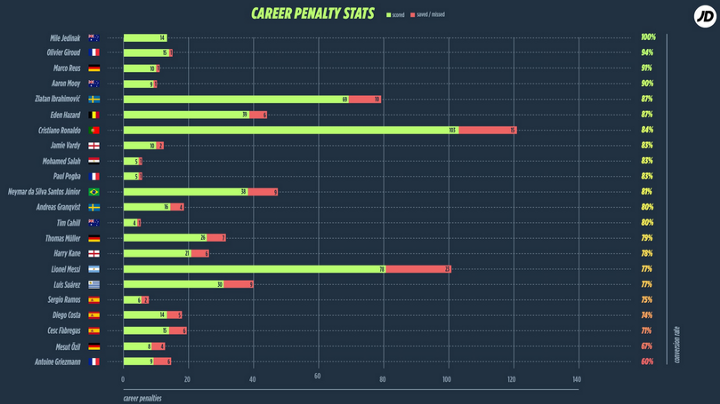

In [14]:
Image(filename='penalty.png')

Now imagine that Ronaldo is taking penalties until he misses one. Let $X$ be the number of shots it takes to miss his first penalty shot. What is the probability that Ronaldo's first missed shot occurs on his 4th attempt?

$$P(X=4) = 0.84^3 \cdot 0.16$$

You can see the equation above as the product of the probabilities of scoring the first 3 shots $0.84 \cdot 0.84 \cdot 0.84 = 0.84^3$ times the probability of missing the 4th $0.16$. Recall that the attempts are independent, that is why we can multiply them like we are doing here.

So the probability of Ronaldo scoring 3 penalties in the row and then missing the 4th is around 10%.

In [15]:
0.84**3*0.16

0.09483263999999998

We can generalize the Probability Mass Function of the Geometric distribution:

$$P(X=k) = (1-p)^{k-1}p$$

### Cumulative Geometric Probability

When calculating the cumulative geometric probability, we can view it from two different perspectives.

Let's imagine that the probability of success $p=0.1$ and that we want to calculate $P(X<5)$.

We can think of it in the following way:

$$\begin{aligned}
P(X<5) &= P(X=1)+P(X=2)+P(X=3)+P(X=4) \\
&= 0.1+0.9\cdot0.1+0.9^2\cdot0.1+0.9^3\cdot0.1
\end{aligned}$$

Or we can think in the opposite direction, where no success exists in the first 4 trials and so:

$$\begin{aligned}
P(X<5) &= 1-P(X=\textit{no success in first 4}) \\
&= 1 - 0.9^4
\end{aligned}$$

In [8]:
def geomcdf_1(p, x):
    # implementing first approach
    prob = 0
    for i in range(x-1):
        prob+=p*(1-p)**i
    return prob

In [9]:
def geomcdf_2(p, x):
    # implementing second approach
    prob = 1-(1-p)**(x-1)
    return prob

In [4]:
geomcdf_1(0.1, 5)

0.34390000000000004

In [5]:
geomcdf_2(0.1, 5)

0.3439

We can see that we get the same result by implementing any of the approaches. The second one is significantly less computational expensive as we do not need to loop over all the cases.

### Expected Value of a Geometric Random Variable

The probability of any discrete RV is the sum of the probability-weighted outcomes.

$$\begin{aligned}
\mathbb{E}(X)=P(X=1) \cdot 1 + P(X=2) \cdot 2 + P(X=3) \cdot 3 + ...
\end{aligned}$$

In a Geometric RV we already know how to calculate the probabilities. $P(X=1)$ is the probability of one success, therefore $P(X=1)=p$. In $P(X=2)$ we have two trials, so necessarly one unsuccessful and one successful trial, therefore $P(X=2)=(1-p)p$ and so on.

$$\begin{aligned}
\mathbb{E}(X)&=p \cdot 1 + (1-p)p \cdot 2 + (1-p)^2p \cdot 3 + ... \\
(1-p)\mathbb{E}(X)&=1p(1-p)+2p(1-p)^2+...
\end{aligned}$$

If we subtract these two equations,

$$\begin{aligned}
\mathbb{E}(X) - (1-p) \mathbb{E}(X)&=1p+1p(1-p)+2p(1-p)^2+... \\
p\mathbb{E}(X) &= p + p(1-p)+p(1-p)^2 + ... \\
\mathbb{E}(X) &= 1 + (1-p)+(1-p)^2 + ...
\end{aligned}$$

And there you go we have a classic geometric series with a common ratio of $(1-p)$. This is in fact one of the reasons why we call it a Geometric RV. The sum of a geometric series is $\frac{1}{1-r}$, where $r$ is the common ratio.

$$\begin{aligned}
\mathbb{E}(X)&=\frac{1}{1-(1-p)} \\
&=\frac{1}{p}
\end{aligned}$$

Now, that we derived the expected value for our Geometric RV, let's experimentally see if we can arrive at the same result.

In [6]:
p=0.2
X = np.random.geometric(p, 1000000)

print('Theoretical expected value: ' + str(X.mean()))
print('Empirically calculated expected value: ' + str(1/p))

Theoretical expected value: 4.999559
Empirically calculated expected value: 5.0


And there you go, we can feel comfortable with our derivation.

## Comparing Poisson Random Variables and Binomial Random Variables

Can we approximate a Poisson Random Variable (RV) from a Binomial RV?

Let's define our RV $X$ as the number of UberEats motorcycles that we see passing by our street.

If we try to build on this idea we somehow get to an expected value of $X$ that would look like:

$$\begin{aligned}
\mathbb{E}(X) &= np \\
&= 60 \frac{minutes}{hour} \cdot \frac{\lambda}{60} \frac{motorcycles}{min}
\end{aligned}$$

And our probability would look like:

$$\begin{aligned}
P(X=k) = \binom{60}{k}\left( \frac{\lambda}{60}\right)^k \left( 1-\frac{\lambda}{60}\right)^{(60-k)}
\end{aligned}$$

The problem is that we can easily get more than 1 motorcyle passing by our street every minute and we cannot account for that with our current setup. But there is a way to do it, let's be more granular.

$$\begin{aligned}
P(X=k) = \binom{3600}{k}\left( \frac{\lambda}{3600}\right)^k \left( 1-\frac{\lambda}{3600}\right)^{(3600-k)}
\end{aligned}$$

Now, we are working with seconds and the probability of seeing 1 motorcycle every second is quite small. But we can still face the problem of having 2 motorcycles pass by our street on half a second. We could get even smaller to account for that. I think that you see where this is going.

We need to understand what happens when $n$ goes to infinity. Before diving in on this, let's revise three properties that we will need further in our proof. The first two are related with limits:

$$\begin{align}\lim_{x \to \infty}\left(1+\frac{a}{x}\right)^x&=e^a  \tag{1}\\
\lim_{x \to a}f(x)g(x)&=\lim_{x \to a}f(x) \lim_{x \to a}g(x) \tag{2}
\end{align}$$


And the third with combinatorics:

$$\frac{x!}{(x-k)!} = x(x-1)(x-2)...(x-k+1) \tag{3}$$

Using these properties we can get the intuition on how the Poisson RV is actually a derivation of a Binomial RV.

$$\begin{align}P(X=k)&=\lim_{x \to \infty}\binom{n}{k}\left( \frac{\lambda}{n} \right)^k\left(1- \frac{\lambda}{n} \right)^{n-k} \\
&= \lim_{x \to \infty}\frac{n!}{(n-k)!k!}\left( \frac{\lambda}{n} \right)^k\left(1- \frac{\lambda}{n} \right)^{n-k} \\
&= \lim_{x \to \infty}\frac{n(n-1)(n-2)...(n-k+1)}{n^k} \cdot \frac{\lambda^k}{k!}\left( \frac{\lambda}{n} \right)^n\left(1- \frac{\lambda}{n} \right)^{n-k} \tag{by using property (3)} \\
&= \lim_{x \to \infty}\frac{n^k + ...}{n^k} \cdot \frac{\lambda^k}{k!} \lim_{x \to \infty}  \left( \frac{\lambda}{n} \right)^n\left(1- \frac{\lambda}{n} \right)^{n-k} \tag{by using property (2)} \\
&= 1 \cdot \frac{\lambda^k}{k!} e^{-\lambda} \cdot 1 \tag{by using property (1)}
\end{align}$$

We just arrived at the Probability Mass Function of a Poisson distribution.

## Proving by computing values of Probability Mass Functions 

We always want to be safe on our proofs and derivations, so let's first compute the Probability Mass Functions for different values of $n$ of a Binomial RV and then compare the results to a Poisson RV with the same rate.

In [7]:
from scipy.stats import binom, poisson
import matplotlib.pyplot as plt

In [8]:
n1 = 20
n2 = 60
n3 = 3600
λ = 9

x = np.arange(9)

X1 = binom.pmf(x, n1, λ/n1)
X2 = binom.pmf(x, n2, λ/n2)
X3 = binom.pmf(x, n3, λ/n3)

Z = poisson.pmf(x, 9)

In [9]:
print(f'P(X1<=9) of a Binomial RV with n={n1}: ' + str(np.sum(X1)))
print(f'P(X2<=9) of a Binomial RV with n={n2}: ' + str(np.sum(X2)))
print(f'P(X3<=9) of a Binomial RV with n={n3}: ' + str(np.sum(X3)))
print(f'P(Z<=9) of a Poisson RV with λ={λ}: ' + str(np.sum(X3)))

P(X1<=9) of a Binomial RV with n=20: 0.41430623411611534
P(X2<=9) of a Binomial RV with n=60: 0.44482436484547344
P(X3<=9) of a Binomial RV with n=3600: 0.455487676774296
P(Z<=9) of a Poisson RV with λ=9: 0.455487676774296


Notice that our intuition was correct, as the value of $n$ gets bigger we are indeed approximating the same probability of a Poisson RV.

## Proving by sampling

We can do the same exercise by sampling from the RVs that we defined above and then compute the probabilities.

In [10]:
X1 = binom.rvs(n=n1, p=λ/n1, size=100000)
X2 = binom.rvs(n=n2, p=λ/n2, size=100000)
X3 = binom.rvs(n=n3, p=λ/n3, size=100000)

Z = poisson.rvs(9, size=100000)

In [11]:
print(f'P(X1<=9) of a Binomial RV with n={n1}: ' + str(X1[X1<9].shape[0]/X1.shape[0]))
print(f'P(X2<=9) of a Binomial RV with n={n2}: ' + str(X2[X2<9].shape[0]/X2.shape[0]))
print(f'P(X3<=9) of a Binomial RV with n={n3}: ' + str(X3[X3<9].shape[0]/X3.shape[0]))
print(f'P(Z<=9) of a Poisson RV with λ={λ}: ' + str(Z[Z<9].shape[0]/Z.shape[0]))

P(X1<=9) of a Binomial RV with n=20: 0.41454
P(X2<=9) of a Binomial RV with n=60: 0.44627
P(X3<=9) of a Binomial RV with n=3600: 0.45736
P(Z<=9) of a Poisson RV with λ=9: 0.45597


We can also plot the Probability Mass Functions for each distribution, notice how the approximation when $n=3600$ is actually a very good one.

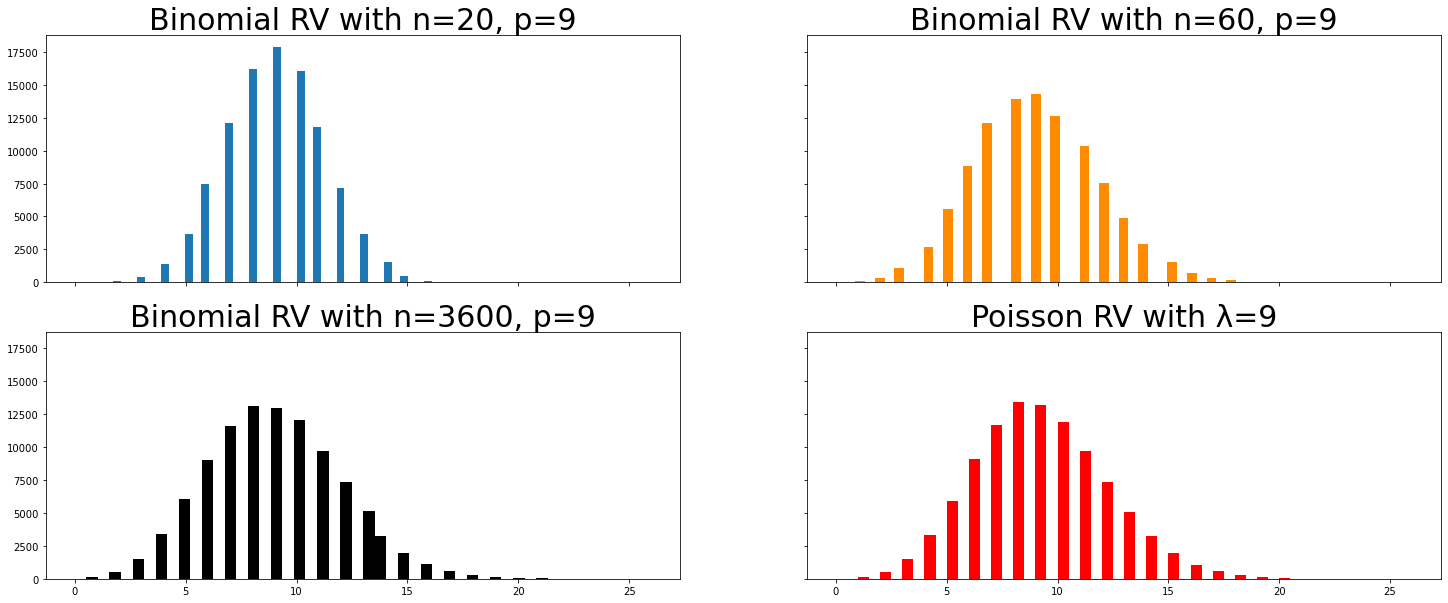

In [23]:
_,ax = plt.subplots(2, 2, figsize=(25, 10), sharey=True, sharex=True)
ax = ax.ravel()

λ=9

ax[0].hist(binom.rvs(n=20, p=9/20, size=100000), bins=50)
ax[0].set_title(f'Binomial RV with n={20}, p={9}', fontsize=30)
ax[1].hist(binom.rvs(n=60, p=9/60, size=100000), bins=50, color='darkorange')
ax[1].set_title(f'Binomial RV with n={60}, p={9}', fontsize=30)
ax[2].hist(binom.rvs(n=1000000, p=9/1000000, size=100000), bins=50, color='black');
ax[2].set_title(f'Binomial RV with n={3600}, p={9}', fontsize=30)
ax[3].hist(poisson.rvs(9, size=100000), bins=50, color='red')
ax[3].set_title(f'Poisson RV with λ={9}', fontsize=30);

# Exercises

You will get the solutions on next week's article.

1. You have a standard deck of cards and you are picking cards until you get a Queen (you replace the cards if they are not Queens). What is the probability that you need to pick 5 cards? And less than 10? And more than 12?

2. Jorge conducts inspections on freezers. He finds that 94% of the freezers successful pass the inspection. Let C be the number of freezers Jorge inspects until a freezer fails an inspection. Assume that the results of each inspection are independent.

3. Pedro makes 25% of the free kicks shots he attempts. For a warm up, Pedro likes to shoot free kicks shots until he makes one. Let M be the number of shots it takes Pedro to make his first free kick. Assume that the results of each shot are independent. Find the probability that it takes Pedro fewer than 4 attempts to make his first shot.

4. Build a function that computes the Poisson PMF without using any functions from external packages besides `np.exp` from `numpy`. Choose some parameters and compare your result with the `pmf` function from `scipy`.

5. Build a function that computes the Poisson CDF without using any external package. Choose some parameters and compare your result with the `cdf` function from `scipy`.

### Answers from last week

In [13]:
def fact(n):
    x = 1
    for i in range(1, n+1):
        x *= i
    return x

def comb(n, k):
    x = 1
    return fact(n)/(fact(k)*fact(n-k))

def binompmf(prob, n, k):
    return comb(n,k)*prob**k*(1-prob)**(n-k)

def binomcdf(prob, n, x):
    result = 0
    for x_ in range(0, x+1):
        result += binompmf(prob, n, x_)
    return result

1. A company produces bottles of water. In its main factory, the number of defective bottles is 5%. A quality check consists in randomly selecting and testing 1000 bottles. What are the mean and standard deviation of the number of defective bottles in these samples?

In [14]:
print('μ_x={}'.format(1000*0.05))
print('σ_x={}'.format((1000*0.05*(1-0.05))**(1/2)))

μ_x=50.0
σ_x=6.892024376045111


 2. A wine company is running a promotion that says 1-in-4 boxes of the wine contain a surprise. Suppose that you are going to buy 5 boxes of this wine, and let X represent the number of surprises you can win in these boxes. Assume that these boxes represent a random sample, and assume that surprises are independent between boxes. What is the probability that you win at most 1 surprise in the 5 boxes?

*(Can you solve this problem in 3 different ways?)*

In [15]:
# We want to calculate P(X<=1)

# Solution 1: By sampling

x = np.random.binomial(5, 0.25, 1000000)

x[x<=1].shape[0]/x.shape[0]

0.632793

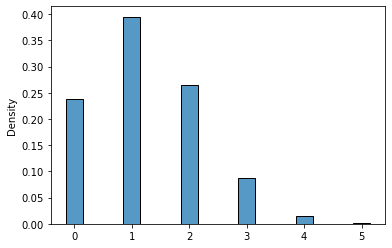

In [16]:
# Let's draw our discrete distribution

sns.histplot(x, stat="density", discrete=True, shrink=0.3);

In [17]:
# Solution 2: Solve it by calculating the probability for each case (X=0 and X=1)

# Using our function
print(str(binompmf(0.25, 5, 0) + binompmf(0.25, 5, 1)))

# Using scipy package
print(str(binom.pmf(0, 5, 0.25)+binom.pmf(1, 5, 0.25)))

0.6328125
0.6328125


In [18]:
# Solution 3: Using the CDF

# Using our function
print(str(binomcdf(0.25, 5, 1)))

# Using scipy package
print(str(binom.cdf(1, 5, 0.25)))

0.6328125
0.6328125


3. A math teacher is doing an activity with her students where she gives them a 20-question multiple choice test, and they know none of the answers. Students need to guess on every question, and each question has 5 possible choices, 1 of which is correct. What are the mean and standard deviation of the number of questions that each student gets correct?

*(Can you solve this problem in 2 different ways?)*

In [19]:
# Solution 1: solving by sampling

n = 20
p = 0.2

# Using numpy package
X = np.random.binomial(20, 0.2, 1000000)

print(X.mean())
print(X.std())

4.003021
1.7873074367771762


In [20]:
# Using the theoretical derivation

μ_x = n*p
σ_x = (n*p*(1-p))**(1/2)

print(μ_x)
print(σ_x)

4.0
1.7888543819998317
